# Processamento de linguagem natural com spaCy e NLTK

In [1]:
#!pip install spacy

In [2]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [3]:
#!pip install --upgrade matplotlib

In [4]:
import matplotlib.pyplot as plt

In [36]:
from spacy.matcher import PhraseMatcher
from IPython.core.display import HTML
from spacy import displacy
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
from spacy.lang.pt.stop_words import STOP_WORDS

## Marcação POS

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos e verbos.
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém

In [6]:
#!python -m spacy download pt_core_news_sm

In [7]:
pln = spacy.load('pt_core_news_sm')
pln

In [8]:
documento = pln('Estou aprendendo processamento de linguagem natural.')
type(documento)

spacy.tokens.doc.Doc

In [9]:
for token in documento:
    print(token.text, token.pos_)  # tipo de palavra

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
. PUNCT


## Lematização e stemização

In [10]:
for token in documento:
    print(token.text, token.lemma_)  # raiz da palavra

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
. .


In [11]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [12]:
nltk.download('rslp')  # para stemização

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\mjuli\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [13]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')   # radical

'aprend'

In [14]:
for token in documento:
    print(f'Palavra: {token.text},\n Lema: {token.lemma_}, \n Stem; {stemmer.stem(token.text)} \n')

Palavra: Estou,
 Lema: Estou, 
 Stem; est 

Palavra: aprendendo,
 Lema: aprender, 
 Stem; aprend 

Palavra: processamento,
 Lema: processamento, 
 Stem; process 

Palavra: de,
 Lema: de, 
 Stem; de 

Palavra: linguagem,
 Lema: linguagem, 
 Stem; lingu 

Palavra: natural,
 Lema: natural, 
 Stem; natur 

Palavra: .,
 Lema: ., 
 Stem; . 



## Carregamento da base de dados

In [15]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [16]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [17]:
dados = dados.read()
dados # códígo html da página

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"e67c46f6-62e3-433e-ae15-b7a8584208f2","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":62586855,"wgRevisionId":62586855,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros e

In [18]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html  # tags do html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"e67c46f6-62e3-433e-ae15-b7a8584208f2","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":62586855,"wgRevisionId":62586855,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com erros em referências","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 inglês-

Texto está na tag \<p>

In [19]:
paragrafos = dados_html.find_all('p')
len(paragrafos)

105

In [20]:
paragrafos[1].text

'Inteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia de produzir sistemas inteligentes". É uma área de p

In [21]:
conteudo =''

for p in paragrafos:
    conteudo += p.text

#conteudo  # todo o texto

In [22]:
conteudo = conteudo.lower()  #para letras minúsculos

## Busca em textos com o SpaCy

In [23]:
pln = spacy.load('pt_core_news_sm')
pln

In [24]:
string = 'turing'
token_pesquisa = pln(string)

In [25]:
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [26]:
doc = pln(conteudo)
matches = matcher(doc)
print(len(matches))
matches

12


[(8661325627334373315, 3030, 3031),
 (8661325627334373315, 3040, 3041),
 (8661325627334373315, 3196, 3197),
 (8661325627334373315, 3201, 3202),
 (8661325627334373315, 3207, 3208),
 (8661325627334373315, 3270, 3271),
 (8661325627334373315, 3897, 3898),
 (8661325627334373315, 5162, 5163),
 (8661325627334373315, 8613, 8614),
 (8661325627334373315, 8748, 8749),
 (8661325627334373315, 8843, 8844),
 (8661325627334373315, 8960, 8961)]

In [27]:
matches[0]   # id, ponto inicial, ponto final

(8661325627334373315, 3030, 3031)

In [28]:
doc[3030:3031]

turing

In [29]:
texto=''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
    inicio = i[1] - numero_palavras
    if inicio<0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<strong>{string}</strong>") 
    texto += "<br><br>"
display(HTML(f"""...{texto}..."""))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado

In [30]:
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
segunda guerra mundial MISC
computing machinery and intelligence" do matemático MISC
alan turing,[5 PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
fascínio PER
google ORG
wikipedia MISC
john mccarthy PER
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
newell PER
humano.[13 MISC
brasil LOC
allen newell PER
herbert simon PER
universidade carnegie mellon, LOC
marvin minsky PER
ia. ORG
estados unidos LOC
“fifth generation project”) MISC
japão LOC
ia ORG
ia LOC
john haugeland PER
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
a.i. MISC
asimov PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
tommy flowers PER
internet computer entity MISC
java MISC
john searle PER
hubert dreyfus PER
fort

In [31]:
displacy.render(doc, style='ent', jupyter=True)

## Nuvem de palavras com Python

In [32]:
color_map = ListedColormap(['orange','green','red','magenta'])

In [34]:
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

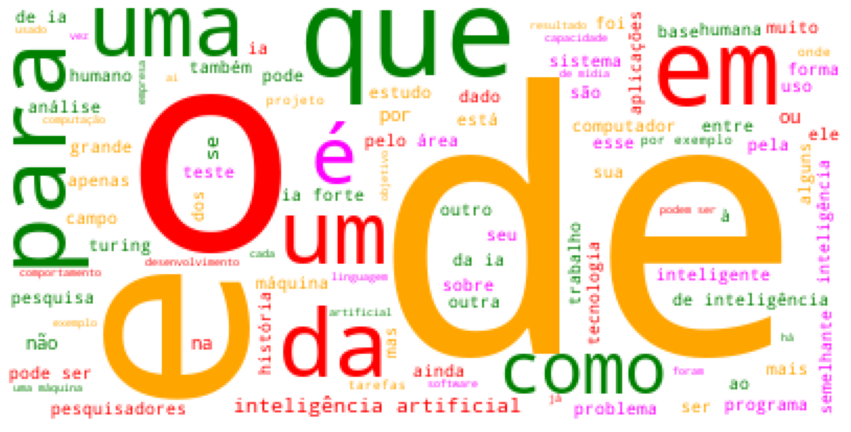

In [35]:
cloud = cloud.generate(conteudo)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

Muitas palavras irrelevantes! (stop words)

In [37]:
print(STOP_WORDS)

{'breve', 'quieta', 'esteve', 'vez', 'caminho', 'até', 'foram', 'apoia', 'nesse', 'deve', 'local', 'oitava', 'seu', 'mesmo', 'lhe', 'vão', 'pôde', 'te', 'és', 'esta', 'vais', 'dizem', 'saber', 'vossas', 'comprida', 'nove', 'pontos', 'segunda', 'porém', 'estes', 'esse', 'pelo', 'é', 'vós', 'pouco', 'temos', 'ou', 'conselho', 'dezanove', 'desta', 'menor', 'estivemos', 'oito', 'terceira', 'puderam', 'não', 'por', 'algo', 'tem', 'nossas', 'aqui', 'lugar', 'fazer', 'antes', 'com', 'ainda', 'quieto', 'momento', 'tendes', 'nesta', 'vens', 'conhecida', 'teve', 'aquelas', 'ademais', 'terceiro', 'estive', 'apenas', 'novas', 'doze', 'vai', 'fazemos', 'foi', 'outras', 'fazes', 'próximo', 'porquanto', 'cuja', 'uns', 'vários', 'deste', 'tiveste', 'questão', 'às', 'área', 'desse', 'de', 'você', 'depois', 'foste', 'sistema', 'tentar', 'estava', 'mas', 'quer', 'estás', 'obrigado', 'das', 'ligado', 'pegar', 'este', 'tentaram', 'minha', 'qualquer', 'ambas', 'dois', 'tiveram', 'máximo', 'as', 'demais', 'a

In [38]:
len(STOP_WORDS)

416

In [41]:
pln.vocab['caminhar'].is_stop  # checar se palavra é stop words

False

In [42]:
doc = pln(conteudo)
lista_token = []
for token in doc:
    lista_token.append(token.text)

In [48]:
len(lista_token)

9881

In [45]:
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop==False:
        sem_stop.append(palavra)

In [46]:
len(sem_stop)

5777

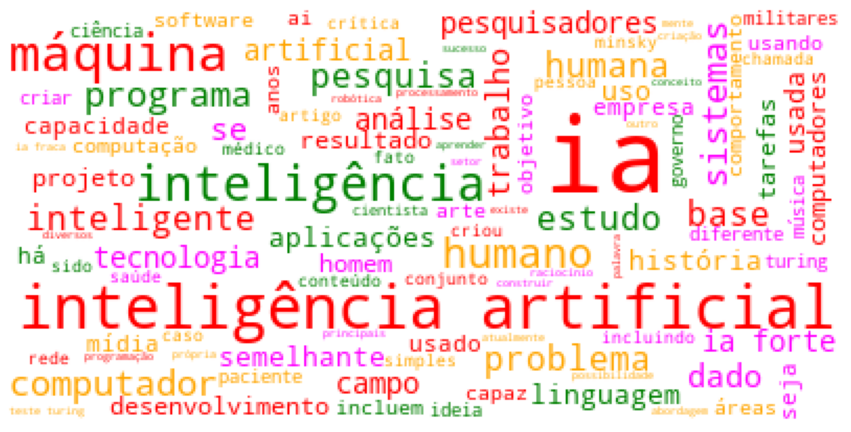

In [49]:
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

Agora sim!